In [1]:
# Szymon Manduk
# August 15, 2021
# import data from the Facial Key Point Detection Dataset (https://www.kaggle.com/prashantarorat/facial-key-point-data) 
# to create a dataset and iterate over data
# The notebook is a part of "Data preparation with Dataset and DataLoader in Pytorch" blog post
# https://aigeekprogrammer.com/data-preparation-with-dataset-and-dataloader-in-pytorch/

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import json # we need to import json file with key points coordinates
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

In [3]:
class FacialDetection(Dataset):
    def __init__(self, dataset_directory="FacialKeyPoint"):
        # set root directory for your dataset
        self.dataset_directory = dataset_directory
        
        # read json file with annotations
        annotations_file = open(self.dataset_directory + "\\all_data.json")
        self.annotations = json.load(annotations_file)
    
    def __len__(self):
        return len(self.annotations)
    
    def __getitem__(self, i):
        image_filename = self.annotations[str(i)]['file_name']
        image_path     = self.dataset_directory + "\\images\\" + image_filename
        image          = img.imread(image_path)
        
        points         = self.annotations[str(i)]['face_landmarks']
        
        return image, np.array(points)

In [17]:
dataset = FacialDetection()
len(dataset)

5000

In [ ]:
image, key_points = dataset.__getitem__(888)

In [7]:
type(image)

numpy.ndarray

In [8]:
type(key_points)

numpy.ndarray

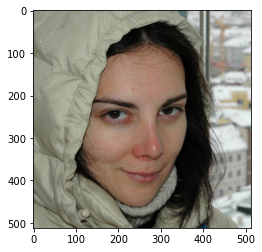

In [16]:
plt.imshow(image)
plt.show()

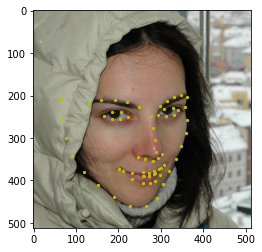

In [9]:
plt.imshow(image)
plt.scatter(key_points[:, 0], key_points[:, 1], marker='o', c='y', s=5)
plt.show()

In [18]:
dataset_loader = DataLoader(dataset, batch_size=4, shuffle=True)
data, labels = next(iter(dataset_loader))
data.size()

torch.Size([4, 512, 512, 3])

In [15]:
labels.size()

torch.Size([4, 68, 2])